In [195]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx.algorithms.community as nx_comm

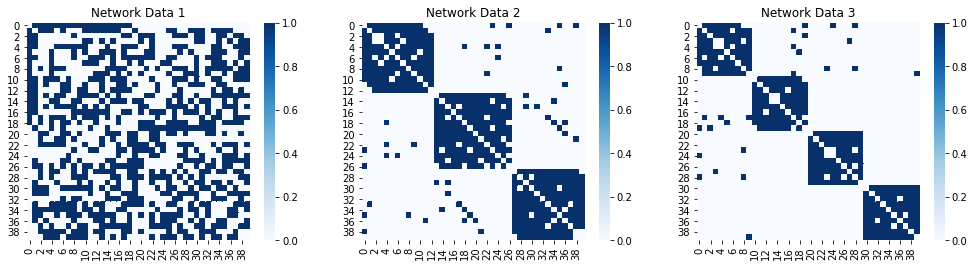

In [198]:
n1= np.load('C:\\Users\\Lenovo\\Desktop\\Dersler_Lenovo\\Graph Theory\\2020-2021\\HM3\\NetworkData1.npy') 
n2= np.load('C:\\Users\\Lenovo\\Desktop\\Dersler_Lenovo\\Graph Theory\\2020-2021\\HM3\\NetworkData2.npy') 
n3= np.load('C:\\Users\\Lenovo\\Desktop\\Dersler_Lenovo\\Graph Theory\\2020-2021\\HM3\\NetworkData3.npy') 
fig= plt.figure(figsize=(17,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.heatmap(n1,cmap='Blues', ax=ax1)
sns.heatmap(n2, cmap='Blues', ax=ax2)
sns.heatmap(n3, cmap='Blues', ax=ax3)
ax1.set_title('Network Data 1')
ax2.set_title('Network Data 2')
ax3.set_title('Network Data 3')
plt.show()

From the visualization given for adjacency matrices, it is seen that graph 1 (network data 1) is a non modular graph where no any dense subgroups in which nodes are more likely to connect each other, is found. However, graph 2 (network data 2) and graph 3 (network data 3) show up as examples for hierarchical modular network structure. In this context, three and four modules can be detected respectively in graph 2 and graph 3, where within modules, nodes are likely to connect densely each other and weakly with other nodes/modules. We can see the hiearchy in modules by checking the connectivity in them, where sub-modules and sub-sub-modules can be found. 

In [199]:
def GirvanNewman(G):
    ''' Function to implement Girman Newman algorithm that finds the number of connected components that gives highest modularity
    Requires networkx graph as input, G
    Outputs the new graph and the number of connected components that gives highest modularity
    '''
    A=nx.adjacency_matrix(G).todense() #adjacency matrix of reference graph
    ModularityValues=[] #empty list to write modulartiy values for each graph generated
    Graphs=[] #empty list to store each graph generated
    while len(G.edges) > 0: #iterate algorithm until there is no edge
        ConnectedComponents=nx.connected_components(G)
        Modularity=nx_comm.modularity(nx.from_numpy_matrix(A), ConnectedComponents)
        ModularityValues.append(Modularity)
        Graphs.append(nx.Graph(G))
        Betweenness=nx.edge_betweenness_centrality(G)
        BetweennessSorted=sorted(Betweenness.items(), key=lambda x: x[1], reverse=True)
        EdgeToRemove=BetweennessSorted[0][0]
        G.remove_edge(*EdgeToRemove)
    return Graphs[ModularityValues.index(max(ModularityValues))], len(sorted(nx.connected_components(Graphs[ModularityValues.index(max(ModularityValues))]), key=len, reverse=True))

In [200]:
#networkx graph are generated -to be input to the GirmanNewman- using the adjacancy matrices from Question 1. 
G1= nx.from_numpy_matrix(n1) 
G2= nx.from_numpy_matrix(n2)
G3= nx.from_numpy_matrix(n3)

In [201]:
#GirmanNewman function is run. Outputs are named as: new graph= graphID, 
#number of conected components that gives highest modularity= num_conID, where ID is numerated 1 to 3. 
graph1, num_con1=GirvanNewman(G1)
graph2, num_con2=GirvanNewman(G2)
graph3, num_con3=GirvanNewman(G3)

In order to interpret well, each network data is visualized with three representations (a, b, and c). First in (a), the new graph derived is visualized by giving different color to each connected components (that has more than one node, otherwise colored as same color) and the number of connected components that gives the highest modularity is written below. Then, in (b) the connected components are projected to the reference graph, and in (c) the adjacency matrix of new graph is illustrated. 

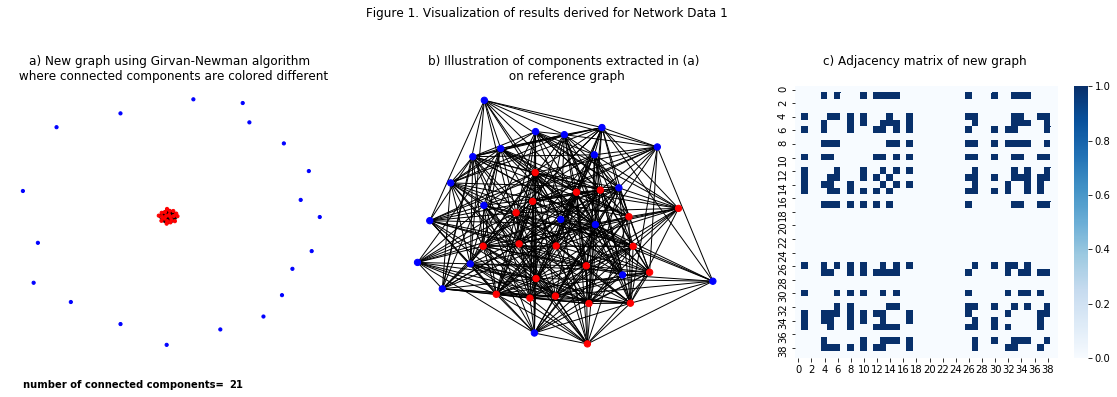

In [202]:
color=['red' if i in largest_components1[0] else 'blue' for i in graph1.nodes] 
#please note that as there are 21 different component, where out of 20 are composed by just one node,
#I prefer to color only the connected component that has more than one node.
fig= plt.figure(figsize=(20,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
nx.draw(graph1, node_size=10, node_color=color, ax=ax1)
nx.draw(nx.from_numpy_matrix(n1), node_size=40, node_color=color, ax=ax2)
sns.heatmap(nx.adjacency_matrix(graph1).todense(),cmap='Blues', ax=ax3)
ax1.set_title('a) New graph using Girvan-Newman algorithm \n where connected components are colored different')
ax1.text(-1, -1.25, 'number of connected components=', fontweight='bold')
ax1.text(0.3, -1.25, num_con1, fontweight='bold')
ax2.set_title('b) Illustration of components extracted in (a) \n on reference graph')
ax3.set_title('c) Adjacency matrix of new graph \n')
fig.suptitle('Figure 1. Visualization of results derived for Network Data 1', y=1.1)
plt.show()

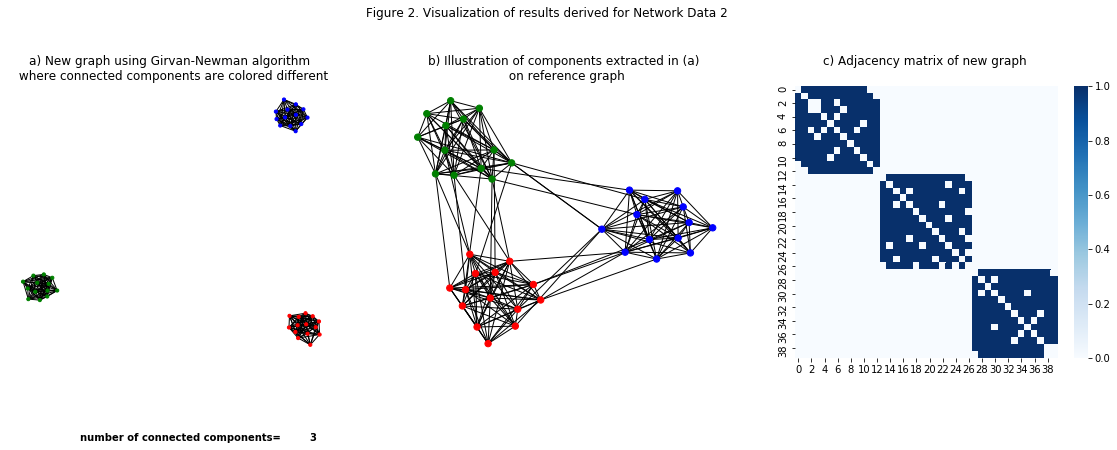

In [208]:
color=['red' if i in largest_components2[0] else 'blue' if i in largest_components2[1] else 'green' if i in largest_components2[2] else 'orange' for i in graph2.nodes]
fig= plt.figure(figsize=(20,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
nx.draw(graph2, node_size=10, node_color=color, ax=ax1)
nx.draw(nx.from_numpy_matrix(n2), node_size=40, node_color=color, ax=ax2)
sns.heatmap(nx.adjacency_matrix(graph2).todense(),cmap='Blues', ax=ax3)
ax1.set_title('a) New graph using Girvan-Newman algorithm \n where connected components are colored different')
ax1.text(-0.7, -1.25, 'number of connected components=', fontweight='bold')
ax1.text(0.5, -1.25, num_con2, fontweight='bold')
ax2.set_title('b) Illustration of components extracted in (a) \n on reference graph')
ax3.set_title('c) Adjacency matrix of new graph \n')
fig.suptitle('Figure 2. Visualization of results derived for Network Data 2', y=1.1)
plt.show()

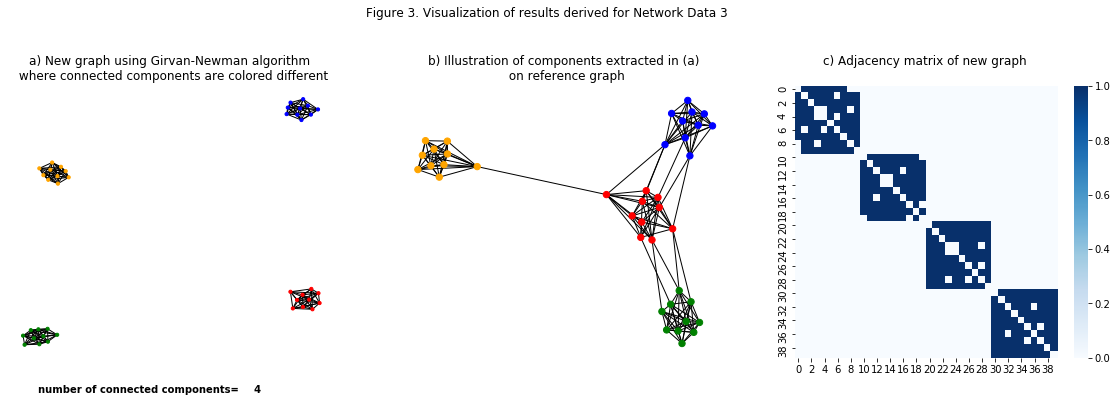

In [212]:
color=['red' if i in largest_components3[0] else 'blue' if i in largest_components3[1] else 'green' if i in largest_components3[2] else 'orange' for i in graph3.nodes]
fig= plt.figure(figsize=(20,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
nx.draw(graph3, node_size=10, node_color=color, ax=ax1)
nx.draw(nx.from_numpy_matrix(n3), node_size=40, node_color=color, ax=ax2)
sns.heatmap(nx.adjacency_matrix(graph3).todense(),cmap='Blues', ax=ax3)
ax1.set_title('a) New graph using Girvan-Newman algorithm \n where connected components are colored different')
ax1.text(-0.7, -1.25, 'number of connected components=', fontweight='bold')
ax1.text(0.4, -1.25, num_con3, fontweight='bold')
ax2.set_title('b) Illustration of components extracted in (a) \n on reference graph')
ax3.set_title('c) Adjacency matrix of new graph \n')
fig.suptitle('Figure 3. Visualization of results derived for Network Data 3', y=1.1)
plt.show()

## Question 4

From the results given Figure 2 and 3, we see that (in each figure) the graph that has the connected components giving highest modularity value, composed by the connected components that we've extracted from adjacency matrix in question 1. Aformentioned fact, can be also seen from b parts of the Figures, where the modules are succesfully detected from reference graph. When we compare the adjancecny matrix given in Figure2-3 with the original adjancency matrices given in question 1, by separating the connected componenets while ensuring to have highest modularity, we can see that the "noise"s on adjacency matrices are erased, and modules appear clearly. 
By implementing Girman Newman algorithm to network data 1, we see that we derive very different adjancecy matrix from the original one, in which some of the connections are removed, while some are preseved in order to extract the connected component that ensures the highest within network modularity. It is seen that, 21 connected components are derived, where only one has more than one node within the module (Figure 1.a). And also, we can conclude as, the "hidden" module is extracted from reference graph (figure 1.b) by using Girman Newman algorithm, with the modularity point of view. 